

<br>
<br>


<h1><center> SFS </center></h1>


<br>
<br>


#### Signal Formation Simulation
The idea is to develop a lightweight and easy-to-use tool for the top-down how affects the performance of the next-generation dark matter detector.
The code is based on the Noble Element Simulation Technique (NEST).


<br>
<br>


#### This Notebook
This is the notebook that was used to actually conduct the study.
It is supposed to further serve as documentation of the ''sfs.py'' library. Feel free to copy the exemplary function calls below into your personal study project.


<br>
<br>


#### Contents


1. **[Setup](#Setup)**
2. **[Imports and Definitions](#Imports-and-Definitions)**
3. **[Detector Definition](#Detector-Definition)**
4. **[Spectra Definition](#Spectra-Definition)**
5. **[Executing NEST](#Executing-NEST)**
6. **[ER/NR Discrimination](#ER/NR-Discrimination)**
7. **[Maximum Likelihood Sensitivity Estimation](#Maximum-Likelihood-Sensitivity-Estimation)**


<br>
<br>


#### Credits
- NEST collaboration
- C. Hock


<br>
<br>



<br>
<br>


# Setup


<br>
<br>


- install NEST following their official documentation
- git clone the ''sfsv2'' repository
- edit the ''sfs.py'' file
- 


<br>
<br>



<br>
<br>


# Imports and Definitions


<br>
<br>


In [1]:

# imports <---- check which one of those are actually needed
import subprocess
import numpy as np
import matplotlib.pyplot as plt


# path definitions
abspath_sfs_repo = "/home/daniel/Desktop/arbeitsstuff/sfs/github_repo_v2/"
abspath_study = abspath_sfs_repo # you'll probably have different paths for 'abspath_sfs_repo' and 'abspath_study'
abspath_detectors = abspath_study +"detectors/"
abspath_spectra = abspath_study +"spectra/"
abspath_resources = abspath_study +"resources/"
abspath_list_plots = [abspath_study +"plots/", "/home/daniel/Desktop/arbeitsstuff/thesis/images/sfs/"]


# importing my personyl matplotlib style files
import matplotlib as mpl
plt.style.use("file:///home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/danielsmplstyle.mplstyle")


# importing the sfs library
import sys
sys.path.append(abspath_sfs_repo)
import sfs



<br>
<br>


# Detector Definition


<br>
<br>



<br>
<br>


# Spectra Definition


<br>
<br>



#### Differential ER and NR Backgrounds

gen_spectrum_plot: initializing
gen_spectrum_plot: setting up canvas and axes
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
give_spectrum_dict: computing the differential rate
give_spectrum_dict: finished compiling the 'spectrum_dict'
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
give_spectrum_dict: computing the differential rate
give_spectrum_dict: finished compiling the 'spectrum_dict'
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_defau

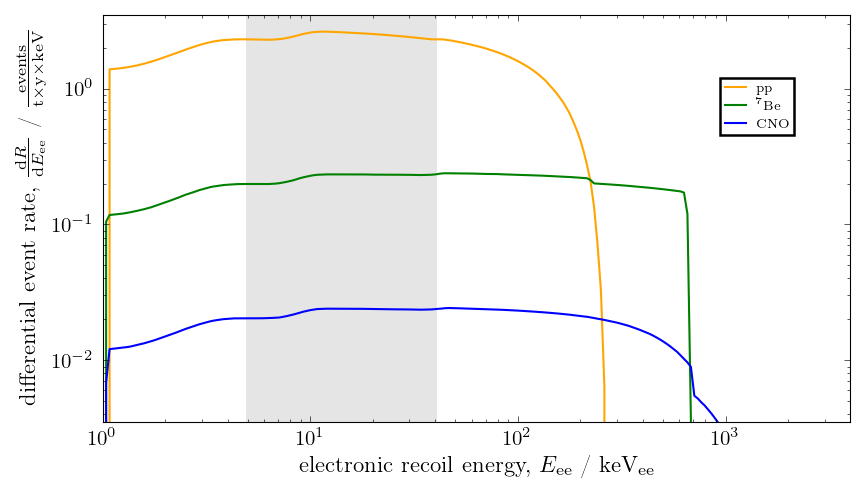

gen_spectrum_plot: initializing
gen_spectrum_plot: setting up canvas and axes
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
give_spectrum_dict: computing the differential rate
give_spectrum_dict: finished compiling the 'spectrum_dict'
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
give_spectrum_dict: computing the differential rate
give_spectrum_dict: finished compiling the 'spectrum_dict'
give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
give_spectrum_dict: co

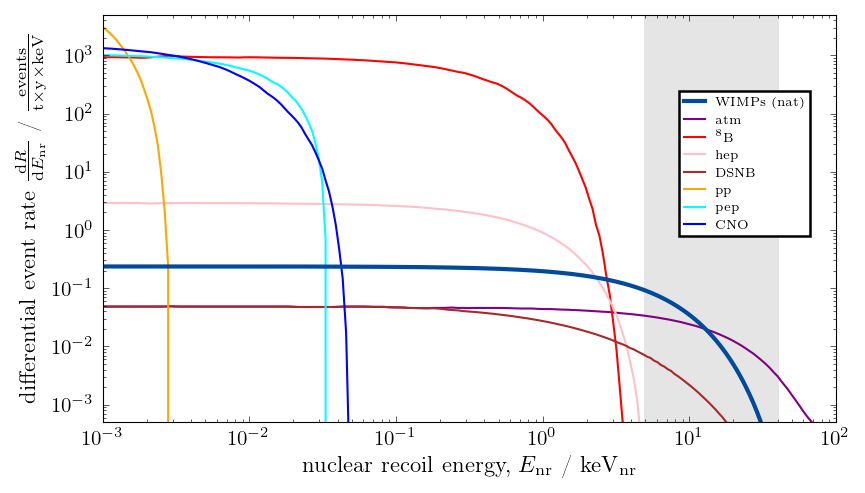

In [6]:

if [False,True][1]:


    sfs.gen_spectrum_plot(
#        spectra_list = ["er_pp", "er_be7_384", "er_be7_861", "er_be7"],
        spectra_list = ["er_pp", "er_be7", "er_cno"],
        plot_x_axis_units = ["kev", "kev_nr", "kev_ee"][2],
        plot_log_y_axis = True,
        plot_log_x_axis = True,
        plot_xlim = [1e+0,4e+3],
        plot_ylim = [3.5e-3,3.5e+0],
        plot_legend_bbox_to_anchor = [0.75, 0.55, 0.25, 0.45],
        plot_legend_labelspacing = 0.5,
        plot_legend_fontsize = 6,
        flag_output_abspath_list = abspath_list_plots,
        flag_output_filename = "darwin_er_background_spectrum.png",
        flag_shade_wimp_eroi = sfs.wimp_eroi_kev_nr,
        flag_verbose = True,)


    sfs.gen_spectrum_plot(
#        spectra_list = ["nr_wimps", "nr_atm", "nr_b8", "nr_hep", "nr_dsnb", "nr_pp", "nr_o15", "nr_pep", "nr_n13", "nr_f17", "nr_be7_384", "nr_be7_861"],
        spectra_list = ["nr_wimps_nat_xe", "nr_atm", "nr_b8", "nr_hep", "nr_dsnb", "nr_pp", "nr_pep", "nr_cno"],
        plot_x_axis_units = ["kev", "kev_nr", "kev_ee"][1],
        plot_log_y_axis = True,
        plot_log_x_axis = True,
        plot_xlim = [1e-3,1e+2],
        plot_ylim = [5e-4,5e+3],
        plot_legend_bbox_to_anchor = [0.75, 0.27, 0.25, 0.73],
        plot_legend_labelspacing = 0.5,
        plot_legend_fontsize = 6,
        flag_output_abspath_list = abspath_list_plots,
        flag_shade_wimp_eroi = sfs.wimp_eroi_kev_nr,
        flag_output_filename = "darwin_nr_background_spectrum.png",
        flag_verbose = True,)



#### Histogrammed ER and NR Background Spectra

In [3]:
test_spectrum_dict = sfs.give_spectrum_dict(
    spectrum_name = "nr_atm",
    recoil_energy_kev_list = [3,4,5,6],
    # 
    abspath_spectra_files = sfs.abspath_sfs_repo_resources,
    exposure_t_y = 40*5,
    num_events = -1,
    # nest parameters
    seed = 0,
    drift_field_v_cm = 200,
    xyz_pos_mm = "-1 -1 -1",
    # flags
    flag_spectrum_type = ["differential", "integrated"][1],
    flag_verbose = False,
    # keywords
    spectrum_dict_default_values = sfs.spectrum_dict_default_dict, # default 'spectrum_dict' values
    #**kwargs, # additional keyword argument values overwriting those from 'spectrum_dict_default_values'
)
print(test_spectrum_dict)

give_spectrum_dict: initializing 'spectrum_dict'
	copying entry from 'spectrum_dict_default_values'
	updating 'spectrum_dict' with specified keyword arguments
give_spectrum_dict: assessing differential rate computation method
<generator object give_spectrum_dict.<locals>.<genexpr> at 0x7f39dcb05dd0>
give_spectrum_dict: computing the integrated rate
give_spectrum_dict: finished compiling the 'spectrum_dict'
{'latex_label': 'atm', 'color': 'purple', 'linestyle': '-', 'linewidth': 1, 'zorder': 1, 'differential_rate_computation': 'interpolation_from_file', 'recoil_energy_kev_list': [3, 4, 5, 6], 'exposure_t_y': 200, 'num_events': -1, 'seed': 0, 'drift_field_v_cm': 200, 'xyz_pos_mm': '-1 -1 -1', 'flag_verbose': False, 'flag_spectrum_type': 'integrated', 'numEvts': [7, 7, 6, 6], 'type_interaction': 'NR', 'E_min[keV]': [3, 4, 5, 6], 'E_max[keV]': [3, 4, 5, 6], 'field_drift[V/cm]': 200, 'x,y,z-position[mm]': '-1 -1 -1'}


#### Testing: NuNuBetaBeta Spectrum

In [4]:


def nunubetabeta_spectrum(

    # Gives dN/dT for the two neutrino double beta decay of 135 Xe
    # as estimated by the Primakoff-Rosen Appromximation.

    kin_energy, #kinetic Energy in keVee. Can also be a numpy array.
    abundance_136Xe = 0.08857, # fraction of 136Xe in the Xenon. Default is the natural abundance

    # Leave the following values alone if you want a Rate[events/y/t/keVee]
    total_mass_Xe=1, # in t
    t=1, # runtime of the detector in years

):
    T = kin_energy# just a change of variable name for brevity.
    Q = 2.4578e3# keV

    # Making the function compatible with both floats, ints and numpy arrays as inputs for kin_energy.
    if isinstance(T, float) or isinstance(T, int):
        shape = 1
    else:
        shape=len(T)
    estimate = T*np.power(Q-T, 5)*(np.ones(shape)+2*T + 4/3 * np.power(T,2)+ np.power(T,3)/3 + np.power(T,4)/30)


    assert t>0 and total_mass_Xe>0, "Invalid detector parameters for spectrum-mode."
    # scale the estimate according to 136Xe half-life, total mass of Xe in the detector, ratio of 136Xe in the Xenon
    half_life_136Xe = 2.19e21 # in y
    molar_mass_Xe = 131.293 # in g/mol, average for Xenon

    A_136Xe = (np.log(2)/half_life_136Xe*total_mass_Xe*1e6/molar_mass_Xe
               *scipy.constants.Avogadro*abundance_136Xe) # Activity of 136Xe

    estimate *= A_136Xe

    return estimate


if [False,True][0]:


    kin_energy = np.linspace(0,3000,100)
    nunubetabeta_rate = nunubetabeta_spectrum(kin_energy)
    plt.figure(figsize = (10,10))
    plt.xlabel("kinetic Energy of electrons [keVee]")
    plt.ylabel("Rate [events/t/y/keVee]")
    plt.plot(kin_energy, nunubetabeta_rate)




<br>
<br>


# Executing NEST


<br>
<br>


In [5]:

if [False,True][0]:


    execNEST_ndarray = sfs.execNEST(
        spectrum_dict = {
#            "numEvts" : [10, 10, 10, 10],
            "numEvts" : 10,
            "type_interaction" : "ER",
#            "E_min[keV]" : [100, 100, 100, 100],
#            "E_max[keV]" : [100, 100, 100, 100],
            "E_min[keV]" : 100,
            "E_max[keV]" : 100,
            "field_drift[V/cm]" : "200",
        },
#        detector_dict = {},
        detector_dict = {
            "g1" : 1.9,
            "g1_gas" : 1.9,
        },
        detector_name = "rndm_new_detector",
        flag_verbose = True,
        flag_print_stdout_and_stderr = False,
    )


    #print(len(execNEST_ndarray))



<br>
<br>


# ER/NR Discrimination


<br>
<br>




<br>
<br>


# Maximum Likelihood Sensitivity Estimation


<br>
<br>

